In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("database.sqlite 3")

tables = pd.read_sql_query(
    "SELECT name FROM sqlite_master WHERE type='table';",
    conn
)

tables

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


In [2]:
matches = pd.read_sql_query("SELECT * FROM Match", conn)

matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [3]:
matches.shape

(25979, 115)

In [4]:
matches.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [5]:
matches.info

<bound method DataFrame.info of           id  country_id  league_id     season  stage                 date  \
0          1           1          1  2008/2009      1  2008-08-17 00:00:00   
1          2           1          1  2008/2009      1  2008-08-16 00:00:00   
2          3           1          1  2008/2009      1  2008-08-16 00:00:00   
3          4           1          1  2008/2009      1  2008-08-17 00:00:00   
4          5           1          1  2008/2009      1  2008-08-16 00:00:00   
...      ...         ...        ...        ...    ...                  ...   
25974  25975       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25975  25976       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25976  25977       24558      24558  2015/2016      9  2015-09-23 00:00:00   
25977  25978       24558      24558  2015/2016      9  2015-09-22 00:00:00   
25978  25979       24558      24558  2015/2016      9  2015-09-23 00:00:00   

       match_api_id  home_team_

In [6]:
matches[['home_team_goal', 'away_team_goal']].describe()

,home_team_goal,away_team_goal
count,25979.000000,25979.000000
mean,1.544594,1.160938
std,1.297158,1.142110
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,9.000000


In [7]:
def get_result(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 'Home Win'
    elif row['home_team_goal'] < row['away_team_goal']:
        return 'Away Win'
    else:
        return 'Draw'

matches['result'] = matches.apply(get_result, axis=1)

In [8]:
matches['result'].value_counts()

result
Home Win    11917
Away Win     7466
Draw         6596
Name: count, dtype: int64

In [9]:
def get_result(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 'Home Win'
    elif row['home_team_goal'] < row['away_team_goal']:
        return 'Away Win'
    else:
        return 'Draw'

matches['result'] = matches.apply(get_result, axis=1)

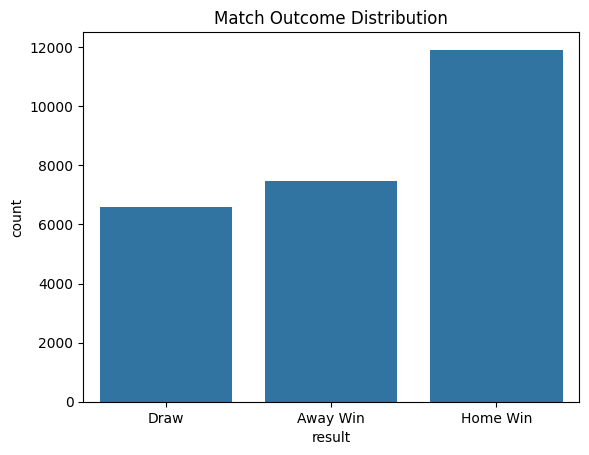

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='result', data=matches)
plt.title("Match Outcome Distribution")
plt.show()

In [11]:
import pandas as pd

m = matches[['date','season','league_id','home_team_api_id','away_team_api_id',
             'home_team_goal','away_team_goal','result']].copy()

m['date'] = pd.to_datetime(m['date'])
m = m.sort_values('date').reset_index(drop=True)

m.head()

,date,season,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result
0,2008-07-18,2008/2009,24558,10192,9931,1,2,Away Win
1,2008-07-19,2008/2009,24558,9930,10179,3,1,Home Win
2,2008-07-20,2008/2009,24558,10199,9824,1,2,Away Win
3,2008-07-20,2008/2009,24558,7955,10243,1,2,Away Win
4,2008-07-23,2008/2009,24558,6493,7955,1,2,Away Win


In [12]:
import numpy as np

home = m[['date','season','league_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']].copy()
home = home.rename(columns={'home_team_api_id':'team_id','away_team_api_id':'opp_id',
                            'home_team_goal':'gf','away_team_goal':'ga'})
home['is_home'] = 1

away = m[['date','season','league_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']].copy()
away = away.rename(columns={'away_team_api_id':'team_id','home_team_api_id':'opp_id',
                            'away_team_goal':'gf','home_team_goal':'ga'})
away['is_home'] = 0

long = pd.concat([home, away], ignore_index=True).sort_values('date').reset_index(drop=True)


long['points'] = np.where(long['gf'] > long['ga'], 3, np.where(long['gf'] == long['ga'], 1, 0))

window = 5
long['pts_last5'] = long.groupby('team_id')['points'].transform(lambda s: s.shift(1).rolling(window).mean())
long['gf_last5']  = long.groupby('team_id')['gf'].transform(lambda s: s.shift(1).rolling(window).mean())
long['ga_last5']  = long.groupby('team_id')['ga'].transform(lambda s: s.shift(1).rolling(window).mean())


home_feats = long[long['is_home']==1][['date','team_id','pts_last5','gf_last5','ga_last5']].rename(
    columns={'team_id':'home_team_api_id',
             'pts_last5':'home_pts_last5','gf_last5':'home_gf_last5','ga_last5':'home_ga_last5'}
)

away_feats = long[long['is_home']==0][['date','team_id','pts_last5','gf_last5','ga_last5']].rename(
    columns={'team_id':'away_team_api_id',
             'pts_last5':'away_pts_last5','gf_last5':'away_gf_last5','ga_last5':'away_ga_last5'}
)

m2 = m.merge(home_feats, on=['date','home_team_api_id'], how='left') \
      .merge(away_feats, on=['date','away_team_api_id'], how='left')

m2['diff_pts_last5'] = m2['home_pts_last5'] - m2['away_pts_last5']
m2['diff_gf_last5']  = m2['home_gf_last5']  - m2['away_gf_last5']
m2['diff_ga_last5']  = m2['home_ga_last5']  - m2['away_ga_last5']

m2[['home_pts_last5','away_pts_last5','diff_pts_last5']].head(10)

,home_pts_last5,away_pts_last5,diff_pts_last5
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

feat_cols = [
    'home_pts_last5','home_gf_last5','home_ga_last5',
    'away_pts_last5','away_gf_last5','away_ga_last5',
    'diff_pts_last5','diff_gf_last5','diff_ga_last5'
]

df = m2.dropna(subset=feat_cols + ['result']).copy()

cut = int(len(df)*0.8)
train = df.iloc[:cut]
test  = df.iloc[cut:]

X_train, y_train = train[feat_cols], train['result']
X_test,  y_test  = test[feat_cols],  test['result']

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

Accuracy: 0.4868816342880032
              precision    recall  f1-score   support

    Away Win       0.47      0.33      0.39      1503
        Draw       0.00      0.00      0.00      1270
    Home Win       0.49      0.87      0.63      2220

    accuracy                           0.49      4993
   macro avg       0.32      0.40      0.34      4993
weighted avg       0.36      0.49      0.40      4993

[[ 491    0 1012]
 [ 273    0  997]
 [ 280    0 1940]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

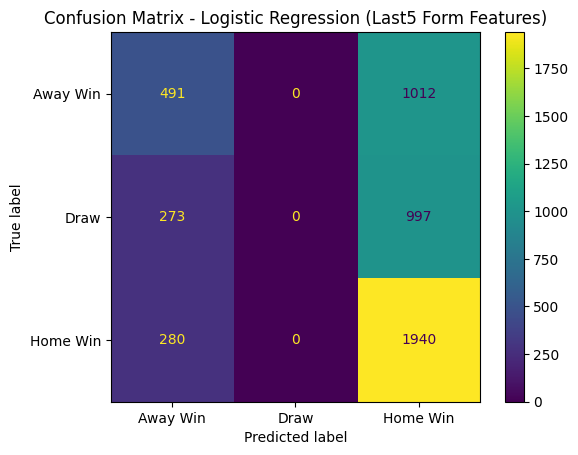

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title("Confusion Matrix - Logistic Regression (Last5 Form Features)")
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model_w = LogisticRegression(max_iter=4000, class_weight="balanced")
model_w.fit(X_train, y_train)

pred_w = model_w.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred_w))
print(classification_report(y_test, pred_w))

Accuracy: 0.4470258361706389
              precision    recall  f1-score   support

    Away Win       0.41      0.52      0.46      1503
        Draw       0.27      0.19      0.23      1270
    Home Win       0.55      0.55      0.55      2220

    accuracy                           0.45      4993
   macro avg       0.41      0.42      0.41      4993
weighted avg       0.44      0.45      0.44      4993



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    class_weight="balanced_subsample",
    n_jobs=-1
)

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Accuracy: 0.43741237732825955
              precision    recall  f1-score   support

    Away Win       0.42      0.34      0.37      1503
        Draw       0.27      0.17      0.21      1270
    Home Win       0.49      0.66      0.56      2220

    accuracy                           0.44      4993
   macro avg       0.39      0.39      0.38      4993
weighted avg       0.41      0.44      0.41      4993



In [17]:
# Teams Performance on the Field 
from sklearn.datasets import make_friedman3


home_perf = long[long['is_home']==1].copy()
home_perf['win'] = (home_perf['gf'] > home_perf['ga']).astype(int)

home_wr = home_perf.groupby('team_id')['win'].mean().reset_index()
home_wr = home_wr.rename(columns={'team_id':'home_team_api_id','win':'home_win_rate'})

# Deplasman performansı
away_perf = long[long['is_home']==0].copy()
away_perf['win'] = (away_perf['gf'] > away_perf['ga']).astype(int)

away_wr = away_perf.groupby('team_id')['win'].mean().reset_index()
away_wr = away_wr.rename(columns={'team_id':'away_team_api_id','win':'away_win_rate'})

m4 = make_friedman3.merge(home_wr, on='home_team_api_id', how='left') \
       .merge(away_wr, on='away_team_api_id', how='left')

m4['diff_win_rate'] = m4['home_win_rate'] - m4['away_win_rate']

AttributeError: 'function' object has no attribute 'merge'

In [ ]:
'm2' in globals(), 'long' in globals()

(True, True)

In [ ]:
import numpy as np

# Takımın iç saha kazanma oranı (tüm geçmişten)
home_perf = long[long['is_home'] == 1].copy()
home_perf['win'] = (home_perf['gf'] > home_perf['ga']).astype(int)

home_wr = home_perf.groupby('team_id')['win'].mean().reset_index()
home_wr = home_wr.rename(columns={'team_id': 'home_team_api_id', 'win': 'home_win_rate'})

# Takımın deplasman kazanma oranı (tüm geçmişten)
away_perf = long[long['is_home'] == 0].copy()
away_perf['win'] = (away_perf['gf'] > away_perf['ga']).astype(int)

away_wr = away_perf.groupby('team_id')['win'].mean().reset_index()
away_wr = away_wr.rename(columns={'team_id': 'away_team_api_id', 'win': 'away_win_rate'})

# m2'ye ekle
m4 = m2.merge(home_wr, on='home_team_api_id', how='left') \
       .merge(away_wr, on='away_team_api_id', how='left')

m4['diff_win_rate'] = m4['home_win_rate'] - m4['away_win_rate']

m4[['home_win_rate','away_win_rate','diff_win_rate']].head()

,home_win_rate,away_win_rate,diff_win_rate
0,0.594406,0.538462,0.055944
1,0.347222,0.237762,0.109460
2,0.454545,0.166667,0.287879
3,0.349206,0.405594,-0.056388
4,0.314815,0.222222,0.092593


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# m2'deki feat_cols (last5) + yeni win_rate feature'ları
feat_cols_win = [
    'home_pts_last5','home_gf_last5','home_ga_last5',
    'away_pts_last5','away_gf_last5','away_ga_last5',
    'diff_pts_last5','diff_gf_last5','diff_ga_last5',
    'home_win_rate','away_win_rate','diff_win_rate'
]

dfw = m4.dropna(subset=feat_cols_win + ['result']).copy()

cut = int(len(dfw)*0.8)
trainw, testw = dfw.iloc[:cut], dfw.iloc[cut:]
X_trainw, y_trainw = trainw[feat_cols_win], trainw['result']
X_testw,  y_testw  = testw[feat_cols_win],  testw['result']

rfw = RandomForestClassifier(
    n_estimators=800,
    random_state=42,
    class_weight="balanced_subsample",
    n_jobs=-1
)

rfw.fit(X_trainw, y_trainw)
pred_w = rfw.predict(X_testw)

print("Accuracy:", accuracy_score(y_testw, pred_w))
print(classification_report(y_testw, pred_w))

Accuracy: 0.49969957941117565
              precision    recall  f1-score   support

    Away Win       0.47      0.45      0.46      1503
        Draw       0.26      0.08      0.12      1270
    Home Win       0.54      0.78      0.64      2220

    accuracy                           0.50      4993
   macro avg       0.42      0.43      0.41      4993
weighted avg       0.45      0.50      0.45      4993



In [ ]:
import joblib

joblib.dump(rfw, "match_model.pkl")

['match_model.pkl']

In [ ]:
teams = matches[['home_team_api_id']].drop_duplicates()
teams.head()

,home_team_api_id
0,9987
1,10000
2,9984
3,9991
4,7947


In [ ]:
teams_df = pd.read_sql_query("SELECT team_api_id, team_long_name FROM Team", conn)
teams_df.head()

,team_api_id,team_long_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem
3,9994,Sporting Lokeren
4,9984,KSV Cercle Brugge
